---
## Step 0: Load The Data

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [7]:
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [8]:
def grayAndEqualizeHist(img):
    """

    :param img: input RGB image
    :return: histogram equalized grayscale image
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY )
    equ  = cv2.equalizeHist(gray)
    #equ  = equ - 128. / 128.
    return equ


img= cv2.imread("images/4.png")
# print(img)
img = np.asarray(img)
# print(img)
img = cv2.resize(img, (32, 32))
img = grayAndEqualizeHist(img)
# cv2.imshow("Processed Image", img)

cv2.waitKey(0)
cv2.destroyAllWindows()


Predicted sign: [9]


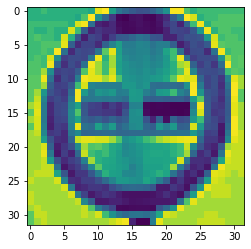

In [9]:
img = img[...,np.newaxis]
# print(img)
plt.imshow(img.reshape(32,32))
print("Predicted sign: "+ str(new_model.predict_classes(img.reshape(1, 32, 32, 1))))

In [10]:
import numpy as np
import cv2
import pickle
 
#############################################
 
frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
##############################################
 
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
# IMPORT THE TRANNIED MODEL
# pickle_in=open("model_trained.p","rb")  ## rb = READ BYTE
# model=pickle.load(pickle_in)
 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'
    
while True:
 
    # READ IMAGE
    success, imgOrignal = cap.read()
    
    # PROCESS IMAGE
    #new
    img = np.asarray(imgOrignal)
    # print(img)
    img = cv2.resize(img, (32, 32))
    img = grayAndEqualizeHist(img)
    cv2.imshow("Processed Image", img)
    img = img[...,np.newaxis]
    img = img.reshape(1, 32, 32, 1)
    #old
    # img = np.asarray(imgOrignal)
    # img = cv2.resize(img, (32, 32))
    # img = preprocessing(img)
    # cv2.imshow("Processed Image", img)
    # img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # PREDICT IMAGE
    predictions = new_model.predict(img)
    classIndex = new_model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
        #print(getCalssName(classIndex))
        cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.imshow("Result", imgOrignal)
    
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break

KeyboardInterrupt: 